# **Project: "DetectaDiabetes", Exploración predictiva de la diabetes, un análisis basado en el BRFSS 2015**
- **Source**: UC Irvine Machine Learning Repository. (19 de Marzo del 2025). CDC Diabetes Health Indicators, enlace https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
- **Date**: 25/09/23
- **Goal**: Create a basic prediction model and a feature explainer

- 1. Introduccion
- 2. Conceptos
- 3. Hipotesis
- 4. Preprocesamiento
- 5. EDA
- 6. Desarrollo de modelos de machine learning
- 7. Comparacion de modelos
- 8. Visualizacion del modelo
- 9. Conclusiones y recomendaciones
- 10. Referencias (apa)

## **1. Introducción**

Este proyecto aborda el tema de la diabetes, una enfermedad crónica que afecta a millones de personas en todo el mundo y tiene un impacto significativo en la calidad de vida y en los sistemas de salud. La detección temprana y el análisis de factores de riesgo son esenciales para desarrollar medidas preventivas eficaces. En este contexto, el presente proyecto se centra en el uso de técnicas de *machine learning* para analizar datos del conjunto **BRFSS** (Behavioral Risk Factor Surveillance System). Su objetivo principal es identificar patrones y construir modelos predictivos que permitan estimar el riesgo de diabetes considerando variables como factores demográficos, conductuales y de salud. 

## **2. Conceptos**

### **2.1 Diabetes**
Enfermedad crónica que afecta la forma en que el cuerpo utiliza la glucosa.
Puede causar daño a órganos y sistemas si no se controla adecuadamente.

### **2.2 Tipos de diabetes**

- Tipo 1: El cuerpo no produce insulina (autoinmune).
- Tipo 2: El cuerpo no usa correctamente la insulina (más común).
- Gestacional: Ocurre durante el embarazo.
- Prediabetes: Glucosa elevada, pero no suficiente para diagnóstico.
- Otros tipos: Monogénica o inducida por daño al páncreas.

### **2.3 Hiperglucemia**
Elevación de los niveles de glucosa en sangre, consecuencia común de la diabetes no controlada.

### **2.4 BRFSS (Behavioral Risk Factor Surveillance System)**
El Sistema de Vigilancia de Factores de Riesgo Conductuales (BRFSS) es una encuesta telefónica sobre salud que los CDC recopilan anualmente. Cada año, la encuesta recopila respuestas de más de 400,000 estadounidenses sobre conductas de riesgo para la salud, enfermedades crónicas y el uso de servicios preventivos. Se lleva a cabo anualmente desde 1984. Para este proyecto, se utilizó un archivo CSV del conjunto de datos disponible en Kaggle para el año 2015. 

### **2.5 Modelos predictivos**
Herramientas basadas en algoritmos de aprendizaje automático que permiten anticipar el riesgo de enfermedades como la diabetes.

### **2.6 Prevención temprana**
Intervenciones proactivas que se basan en la predicción del riesgo para evitar o retrasar la aparición de enfermedades.

### **2.7 Carga económica de la diabetes**
En 2017, la diabetes costó a EE. UU. más de $245 mil millones en atención médica, lo que resalta su impacto en la economía y el sistema de salud.

### **2.8 Dataset BRFSS 2015**
Conjunto de datos que incluye información demográfica, de salud y estilo de vida, con 35 variables, utilizado para entrenar modelos de clasificación para detectar diabetes y prediabetes.

## **3. Hipotesis**

Se plantea que las variables contenidas en el dataset BRFSS poseen una relación significativa y son predictivas de la aparición de casos de diabetes en la población estudiada.

![Diagrama diabetes](../images/DIAGRAMA_DETECTADIABETES.png)

## **4. Preprocesamiento**

In [35]:
import pickle
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    matthews_corrcoef,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
from sklearn.inspection import(
    permutation_importance
)
from sklearn.compose import(
    ColumnTransformer
)
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

### **4.1. Data loading**
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [2]:
df_raw = pd.read_csv('../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv') 
# la base usada tiene dos clases: 0 para ausencia de diabetes y 1 para prediabetes o diabetes. 
# #Este conjunto de datos tiene 21 variables características y no está balanceado.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df_raw.sample(10, random_state=2025).iloc[:, :10]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
193431,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0
155853,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0
184730,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,1.0,1.0
247003,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0
189342,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0
85177,1.0,1.0,1.0,1.0,36.0,1.0,0.0,1.0,1.0,1.0
100451,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0
189709,0.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0
140777,0.0,0.0,0.0,1.0,35.0,1.0,0.0,1.0,0.0,0.0
83300,1.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0


Al observar las primeras 10 columnas, se observa que todas las variables excepto "BMI", son binarias por lo tanto se deben categorizar las variables en el preprocesamiento.

In [4]:
df_raw.sample(10, random_state=2025).iloc[:, 11:22]

,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
193431,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,3.0
155853,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0
184730,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,5.0,6.0
247003,0.0,1.0,0.0,2.0,0.0,30.0,0.0,0.0,4.0,5.0,6.0
189342,0.0,0.0,1.0,2.0,15.0,2.0,0.0,1.0,8.0,6.0,6.0
85177,0.0,1.0,0.0,5.0,0.0,7.0,0.0,1.0,12.0,5.0,5.0
100451,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,5.0
189709,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,5.0,4.0
140777,0.0,0.0,1.0,5.0,30.0,30.0,1.0,1.0,9.0,4.0,7.0
83300,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,5.0,6.0,8.0


En las últimas 10 columnas, tambien se observa que casi la mitad de la variables son binarias,. por tanto se debe hacer el mismo tratamiento de categorizar las variables, y las otras variables como "GenHlth" es una escala ordinal, por lo que la podemos dejar númerica, porque el 5 es mas importante que el 1, y puede ayudar en el algoritmo, asi mismo pasa con "GenHlth", "MentHlth", "PhysHlth", "Education", "Income". A diferencia de "Age" se debe categorizar, ya que de cierta manera hay un orden lógico, entre las categorías pero no necesariamente la distancia entre los niveles se interpreta como equivalente.

#### **Data Dictionary**
|Name|Role|Type|Description|
|----|----|----|-----------|
| Diabetes_binary| Target  | Binary  | 0 is for no diabetes or only during pregnancy, 1 is for prediabetes and for diabetes.                                           |
| HighBP                | Feature | Binary  | 0 = no high BP, 1 = high BP                                                                               |
| HighChol              | Feature | Binary  | 0 = no high cholesterol, 1 = high cholesterol                                                             |
| CholCheck             | Feature | Binary  | 0 = no cholesterol check in 5 years, 1 = yes                                                              |
| BMI                   | Feature | Integer | Body Mass Index                                                                                           |
| Smoker                | Feature | Binary  | Smoked at least 100 cigarettes in your life? 0 = no, 1 = yes                                              |
| Stroke                | Feature | Binary  | Ever told you had a stroke. 0 = no, 1 = yes                                                               |
| HeartDiseaseorAttack | Feature | Binary  | Coronary heart disease or myocardial infarction. 0 = no, 1 = yes                                          |
| PhysActivity          | Feature | Binary  | Physical activity in past 30 days (not job-related). 0 = no, 1 = yes                                      |
| Fruits                | Feature | Binary  | Consume fruit ≥1 times per day. 0 = no, 1 = yes                                                           |
| Veggies               | Feature | Binary  | Consume vegetables ≥1 times per day. 0 = no, 1 = yes                                                      |
| HvyAlcoholConsump     | Feature | Binary  | Heavy drinker (men >14 drinks/week, women >7). 0 = no, 1 = yes                                           |
| AnyHealthcare         | Feature | Binary  | Any kind of health coverage. 0 = no, 1 = yes                                                              |
| NoDocbcCost           | Feature | Binary  | Couldn’t see doctor due to cost. 0 = no, 1 = yes                                                          |
| GenHlth               | Feature | Integer | General health: 1 = excellent, 5 = poor                                                                   |
| MentHlth              | Feature | Integer | Days mental health was not good (past 30 days). Scale 1–30                                               |
| PhysHlth              | Feature | Integer | Days physical health was not good (past 30 days). Scale 1–30                                             |
| DiffWalk              | Feature | Binary  | Difficulty walking/climbing stairs. 0 = no, 1 = yes                                                       |
| Sex                   | Feature | Binary  | 0 = female, 1 = male                                                                                      |
| Age                   | Feature | Integer | 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older |
| Education             | Feature | Integer | scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)|
| Income                | Feature | Integer | Income scale: 1 = < $10k,  5 = < $35k, 8 = $75k+                                                           |

### **4.2. Data preprocessing**
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [5]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['diabetes_binary'] = df_baking['diabetes_binary'].map({0:'no_diabetes', 1 : 'diabetes'})
df_baking['diabetes'] = df_baking['diabetes_binary'].astype('category')
df_baking = df_baking.drop(['diabetes_binary'], axis=1)
df_baking['highbp'] = df_baking['highbp'].map({0:'no', 1 : 'yes'})
df_baking['highbp'] = df_baking['highbp'].astype('category')
df_baking['highchol'] = df_baking['highchol'].map({0:'no', 1 : 'yes'})
df_baking['highchol'] = df_baking['highchol'].astype('category')
df_baking['cholcheck'] = df_baking['cholcheck'].map({0:'no', 1 : 'yes'})
df_baking['cholcheck'] = df_baking['cholcheck'].astype('category')
df_baking['smoker'] = df_baking['smoker'].map({0:'no', 1 : 'yes'})
df_baking['smoker'] = df_baking['smoker'].astype('category')
df_baking['stroke'] = df_baking['stroke'].map({0:'no', 1 : 'yes'})
df_baking['stroke'] = df_baking['stroke'].astype('category')
df_baking['heartdiseaseorattack'] = df_baking['heartdiseaseorattack'].map({0:'no', 1 : 'yes'})
df_baking['heartdiseaseorattack'] = df_baking['heartdiseaseorattack'].astype('category')
df_baking['physactivity'] = df_baking['physactivity'].map({0:'no', 1 : 'yes'})
df_baking['physactivity'] = df_baking['physactivity'].astype('category')
df_baking['fruits'] = df_baking['fruits'].map({0:'no', 1 : 'yes'})
df_baking['fruits'] = df_baking['fruits'].astype('category')
df_baking['veggies'] = df_baking['veggies'].map({0:'no', 1 : 'yes'})
df_baking['veggies'] = df_baking['veggies'].astype('category')
df_baking['hvyalcoholconsump'] = df_baking['hvyalcoholconsump'].map({0:'no', 1 : 'yes'})
df_baking['hvyalcoholconsump'] = df_baking['hvyalcoholconsump'].astype('category')
df_baking['anyhealthcare'] = df_baking['anyhealthcare'].map({0:'no', 1 : 'yes'})
df_baking['anyhealthcare'] = df_baking['anyhealthcare'].astype('category')
df_baking['nodocbccost'] = df_baking['nodocbccost'].map({0:'no', 1 : 'yes'})
df_baking['nodocbccost'] = df_baking['nodocbccost'].astype('category')
df_baking['diffwalk'] = df_baking['diffwalk'].map({0:'no', 1 : 'yes'})
df_baking['diffwalk'] = df_baking['diffwalk'].astype('category')
df_baking['sex'] = df_baking['sex'].map({0:'female', 1 : 'male'})
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['age'] = df_baking['age'].map({1:'entre_18_y_24', 2 : 'entre_25_y_29', 3: 'entre_30_y_34',
                                         4:'entre_35_y_39', 5:'entre_40_y_44', 6:'entre_45_y_49', 7:'entre_50_y_54', 
                                         8:'entre_55_y_59', 9:'entre_60_y_64', 10:'entre_65_y_69', 11:'entre_70_y_74',
                                         12:'entre_75_y_79',13:'entre_80_y_99'})
df_baking['age'] = df_baking['age'].astype('category')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   highbp                253680 non-null  category
 1   highchol              253680 non-null  category
 2   cholcheck             253680 non-null  category
 3   bmi                   253680 non-null  float64 
 4   smoker                253680 non-null  category
 5   stroke                253680 non-null  category
 6   heartdiseaseorattack  253680 non-null  category
 7   physactivity          253680 non-null  category
 8   fruits                253680 non-null  category
 9   veggies               253680 non-null  category
 10  hvyalcoholconsump     253680 non-null  category
 11  anyhealthcare         253680 non-null  category
 12  nodocbccost           253680 non-null  category
 13  genhlth               253680 non-null  float64 
 14  menthlth              253680 non-nul

In [6]:
df.sample(10, random_state=2025)

,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,...,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
193431,no,yes,yes,24.0,no,no,no,yes,yes,yes,...,no,2.0,0.0,0.0,no,female,entre_70_y_74,6.0,3.0,no_diabetes
155853,no,no,yes,31.0,no,no,no,no,no,no,...,no,2.0,0.0,0.0,no,female,entre_25_y_29,5.0,4.0,no_diabetes
184730,no,no,no,31.0,no,no,no,yes,yes,yes,...,no,2.0,0.0,0.0,no,female,entre_30_y_34,5.0,6.0,no_diabetes
247003,no,no,yes,26.0,yes,no,no,yes,no,yes,...,no,2.0,0.0,30.0,no,female,entre_35_y_39,5.0,6.0,no_diabetes
189342,no,yes,yes,25.0,no,no,no,yes,yes,yes,...,yes,2.0,15.0,2.0,no,male,entre_55_y_59,6.0,6.0,no_diabetes
85177,yes,yes,yes,36.0,yes,no,yes,yes,yes,yes,...,no,5.0,0.0,7.0,no,male,entre_75_y_79,5.0,5.0,diabetes
100451,no,no,yes,23.0,no,no,no,yes,yes,yes,...,no,1.0,0.0,0.0,no,male,entre_60_y_64,5.0,5.0,no_diabetes
189709,no,yes,yes,31.0,no,no,no,yes,no,no,...,no,2.0,0.0,0.0,no,male,entre_45_y_49,5.0,4.0,no_diabetes
140777,no,no,yes,35.0,yes,no,yes,no,no,yes,...,yes,5.0,30.0,30.0,yes,male,entre_60_y_64,4.0,7.0,no_diabetes
83300,no,yes,yes,27.0,yes,no,no,yes,yes,yes,...,no,2.0,0.0,2.0,no,male,entre_40_y_44,6.0,8.0,diabetes


In [7]:
df['diabetes'].value_counts(normalize=True)

diabetes
no_diabetes    0.860667
diabetes       0.139333
Name: proportion, dtype: float64

Se observa que la variable objetivo esta desbalanceada, como ya se menciono anteriormente, el 86% de la base a estudiar "no tiene diabetes" y el 14% restante representa a las personas "con diabetes". Cabe destacar que este dataset concuerda con los estudios que se hacen anualmente, que indican que en Estados Unidos alrededor de 13% de la población padece Diabetes. 

### **4.3. Exploratory Data Analysis**
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [8]:
df_train, df_test = train_test_split(
    df, test_size=0.2,
    stratify=df['diabetes'], # si es clasificacion siempre se debe usar 'stratify'
    random_state=2025
)
df_train, df_val = train_test_split(
    df_train, test_size=0.20,
    stratify=df_train['diabetes'],
    random_state=2025
)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.shape, df_val.shape, df_test.shape

((162355, 22), (40589, 22), (50736, 22))

In [9]:
display(df_train.describe(include='category').T)

,count,unique,top,freq
highbp,162355,2,no,92826
highchol,162355,2,no,93621
cholcheck,162355,2,yes,156249
smoker,162355,2,no,90451
stroke,162355,2,no,155719
heartdiseaseorattack,162355,2,no,147145
physactivity,162355,2,yes,122769
fruits,162355,2,yes,102869
veggies,162355,2,yes,131576
hvyalcoholconsump,162355,2,no,153235


En el describe de las varibales categóricas, se puede observar lo siguiente:
- 'highbp': tiene como valor top "no", que representa el 57.1% de la base de train.
- 'highchol': tiene como valor top "no", que representa el 57.6% de la base de train.
- 'cholcheck': tiene como valor top "yes", que representa el 96.2% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'smoker': tiene como valor top "no", que representa el 55.7% de la base de train.
- 'stroke': tiene como valor top "no", que representa el 95.9% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'heartdiseaseorattack': tiene como valor top "no", que representa el 90.6% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'physactivity': tiene como valor top "yes", que representa el 75.6% de la base de train, esta desbalanceada pero no tanto como las otras.
- 'fruits': tiene como valor top "yes", que representa el 63.3% de la base de train.
- 'veggies': tiene como valor top "yes", que representa el 81.0% de la base de train, esta desbalanceada, se evaluara cuando se hagan los análisis.
- 'hvyalcoholconsump': tiene como valor top "no", que representa el 94.3% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'anyhealthcare': tiene como valor top "yes", que representa el 95.0% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'nodocbccost': tiene como valor top "no", que representa el 90.3% de la base de train, se debe considerar si usarla o no porque esta muy desbalanceada.
- 'diffwalk': tiene como valor top "no", que representa el 83.1% de la base de train, se debe revisar si usarla o no porque esta desbalanceada.
- 'sex': tiene como valor top "female", que representa el 55.7% de la base de train, se puede decir que esta casi balanceada en cuanto al género.
- 'age': tiene como valor top "entre_60_y_64", que representa el 13.0% de la base de train.

In [10]:
display(df_train.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
bmi,162355.0,28.373755,6.576969,12.0,24.0,27.0,31.0,98.0
genhlth,162355.0,2.511503,1.069108,1.0,2.0,2.0,3.0,5.0
menthlth,162355.0,3.171230,7.399395,0.0,0.0,0.0,2.0,30.0
physhlth,162355.0,4.233291,8.710245,0.0,0.0,0.0,3.0,30.0
education,162355.0,5.051905,0.984724,1.0,4.0,5.0,6.0,6.0
income,162355.0,6.052576,2.073687,1.0,5.0,7.0,8.0,8.0


Observando las variables, se puede ver en la variable BMI entre el minimo y el primer cuartil la diferencia es de 12, pero entre el tercer cuartil y el max hay una gran diferencia, se debe revisar la naturaleza de BMI en Estados Unidos, para descartar posibles valores fuera de lugar, y las variables 'menthlth' y 'physhlth' tienen una concentración entre el primer cuartil y la mediana. Para las variables 'genhlth', 'education', y 'income' tiene una distribución similar.

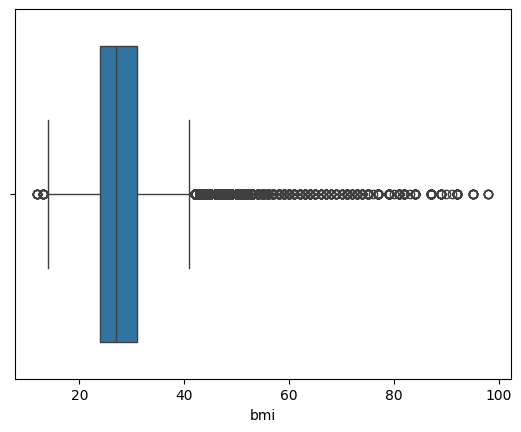

In [11]:
sns.boxplot(data=df_train, x='bmi')
plt.show()

En este gráfico, se observa mas detallada la variable 'BMI', lo que se puede decir a simple vista es que hay valores por debajo de 20, y muy por encima de 40, hay valores que incluso llegan cerca de 100, esto parece ser imposible.

In [12]:
Q1 = df_train['bmi'].quantile(0.25)  # Primer cuartil
Q3 = df_train['bmi'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1                     # Rango intercuartílico

# Limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_lower = df_train[(df_train['bmi'] < lower_bound)]

outliers_upper = df_train[(df_train['bmi'] > upper_bound)]


In [13]:
outliers_lower['bmi']

44010     13.0
46375     12.0
46947     13.0
50439     12.0
56665     13.0
59890     13.0
92043     13.0
92622     13.0
95997     12.0
111039    12.0
112429    13.0
115391    13.0
118563    13.0
126457    12.0
128648    13.0
131199    13.0
131971    12.0
Name: bmi, dtype: float64

In [14]:
outliers_upper['bmi']

12        55.0
103       50.0
119       46.0
126       42.0
134       51.0
          ... 
162186    44.0
162217    53.0
162296    55.0
162317    47.0
162346    59.0
Name: bmi, Length: 6248, dtype: float64

In [15]:
outliers_mayor_60 = df_train[(df_train['bmi'] > 70)]
outliers_mayor_60

,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,...,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
337,yes,no,yes,71.0,no,no,yes,yes,yes,yes,...,no,1.0,0.0,0.0,no,male,entre_60_y_64,5.0,7.0,no_diabetes
534,yes,yes,yes,89.0,no,no,no,yes,yes,yes,...,no,3.0,0.0,5.0,no,female,entre_70_y_74,6.0,6.0,diabetes
1051,yes,no,yes,79.0,no,no,no,yes,yes,yes,...,no,3.0,0.0,0.0,no,female,entre_55_y_59,4.0,8.0,no_diabetes
1196,yes,yes,yes,77.0,no,no,no,yes,yes,yes,...,no,3.0,0.0,0.0,no,male,entre_55_y_59,6.0,7.0,no_diabetes
1300,no,yes,yes,75.0,no,no,no,yes,yes,yes,...,yes,4.0,4.0,8.0,yes,male,entre_60_y_64,5.0,7.0,no_diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158587,yes,yes,yes,82.0,yes,no,no,yes,no,yes,...,no,2.0,0.0,0.0,no,male,entre_65_y_69,6.0,8.0,no_diabetes
159236,no,yes,yes,75.0,yes,no,no,yes,no,yes,...,no,3.0,1.0,0.0,no,male,entre_50_y_54,5.0,8.0,no_diabetes
161055,no,no,yes,89.0,yes,no,no,yes,yes,yes,...,no,3.0,0.0,0.0,no,female,entre_60_y_64,5.0,7.0,no_diabetes
161684,yes,yes,yes,79.0,yes,yes,no,yes,yes,yes,...,no,4.0,4.0,3.0,no,male,entre_70_y_74,2.0,4.0,no_diabetes


#### **4.3.1 Univariate Analysis**

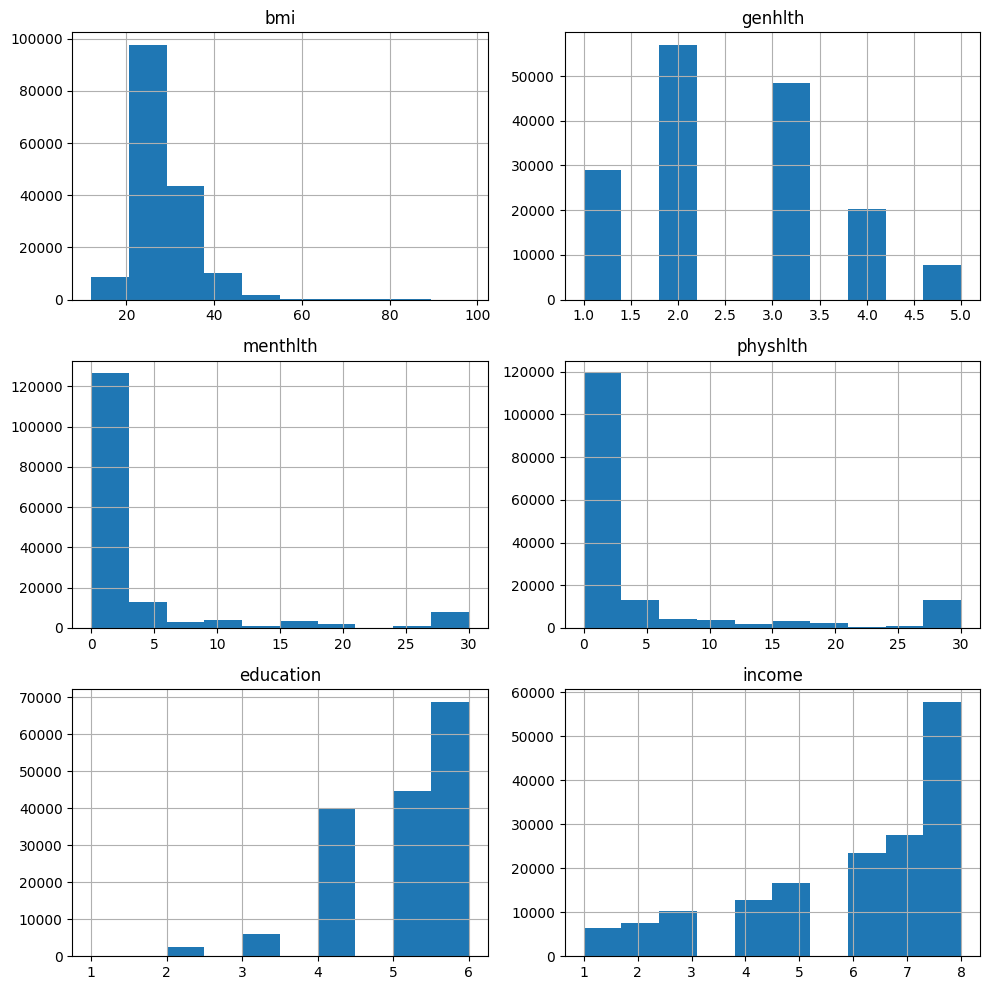

In [16]:
df_train.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

En el análisis univariado, se pueden ver a detalle las distribuciones de las variables, "BMI" tiende a una distribución normal, con una cola derecha que se debe a los outliers, "menthlth" y "physhlth" se ve concentrada en el 0, con una cola derecha en la distribución, y las otras variables que son ordinales, tienen una distribución multimodal.

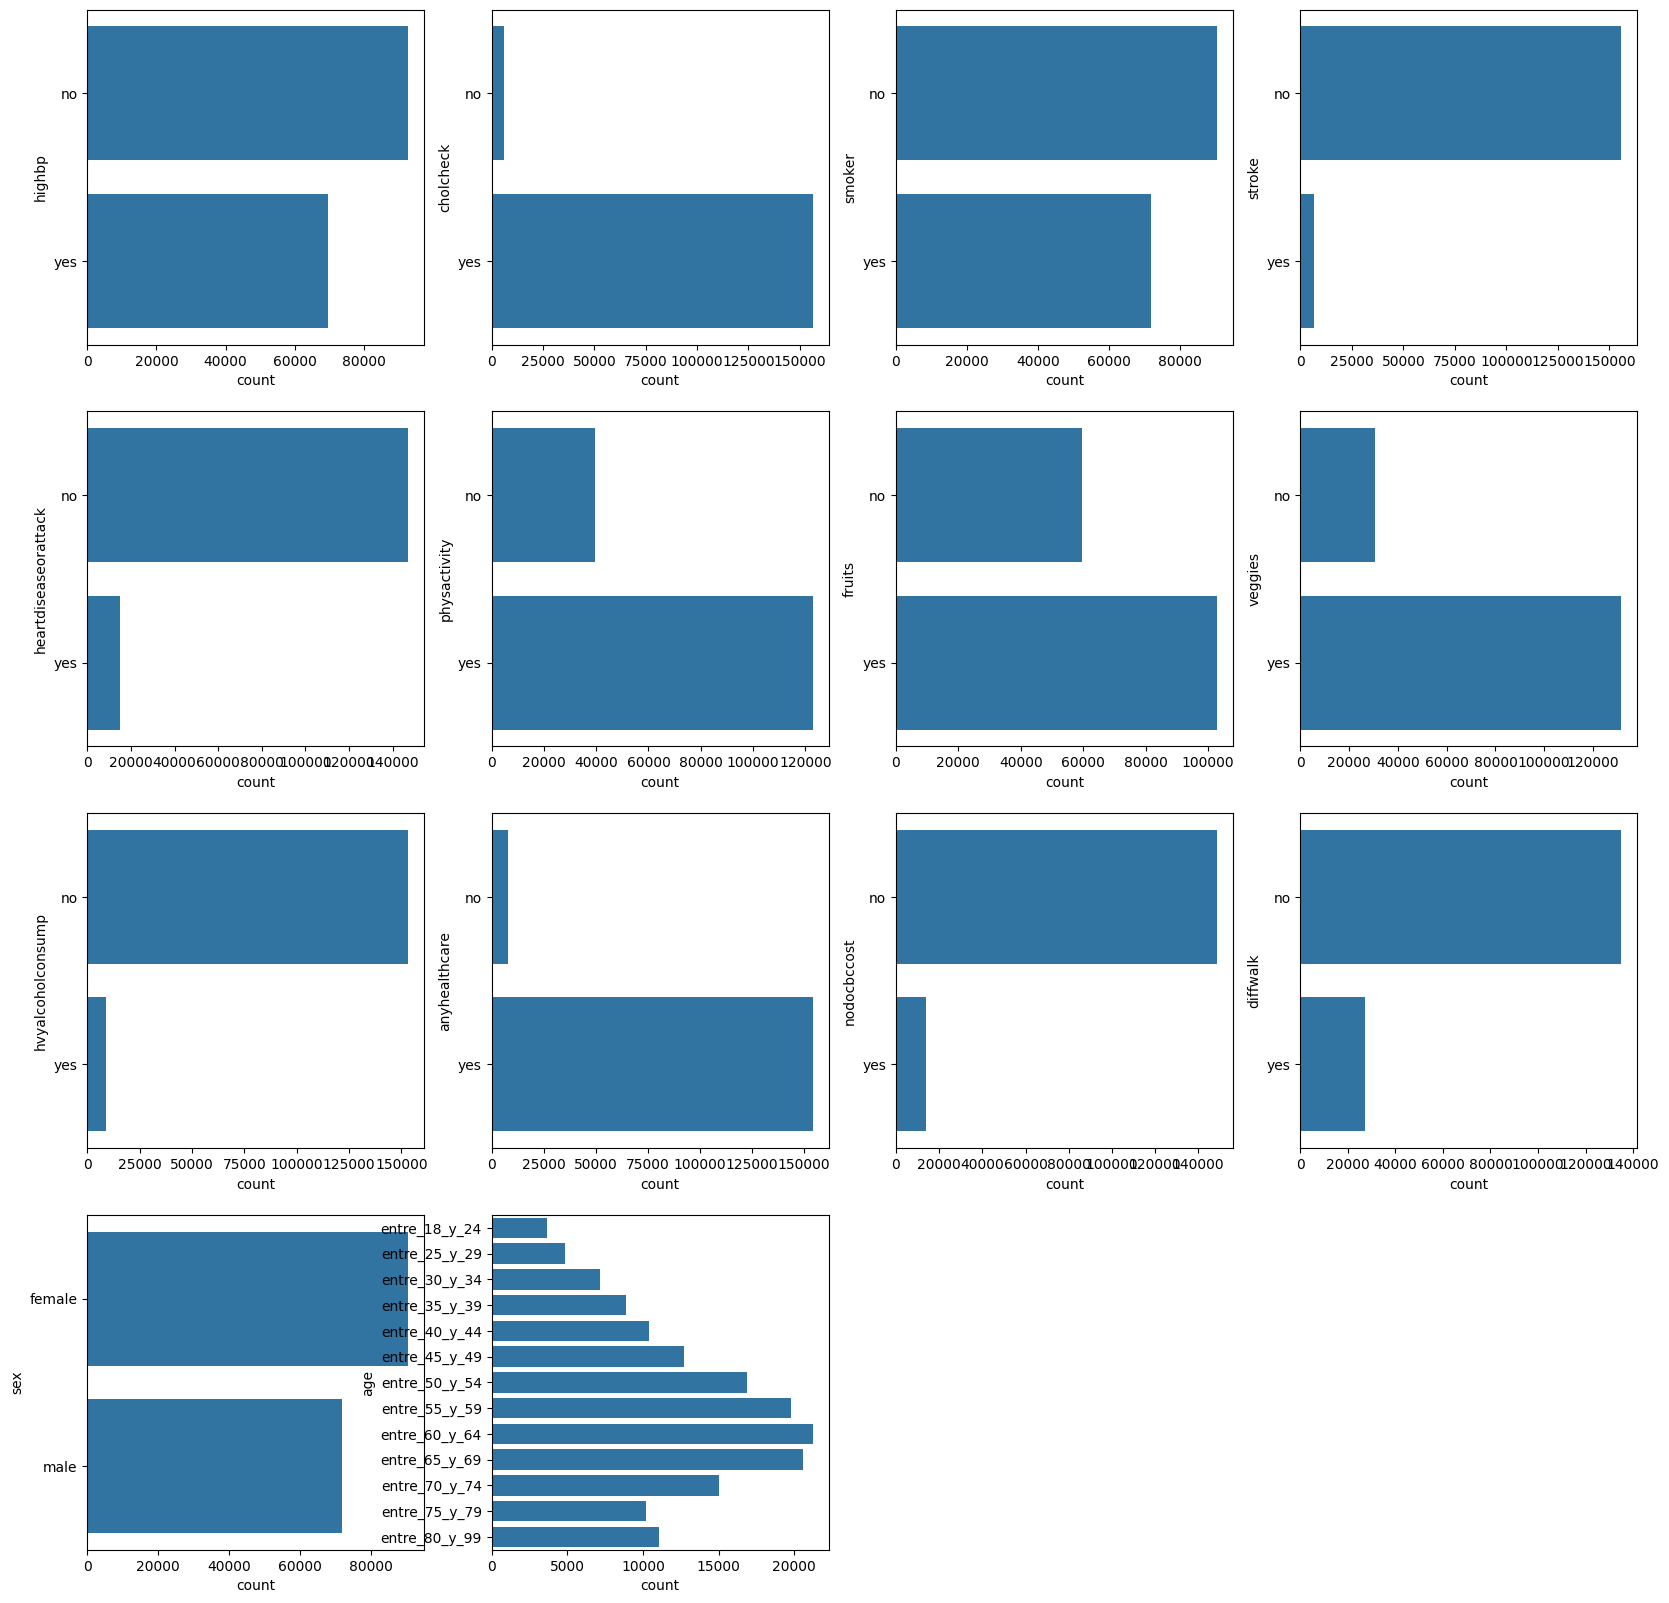

In [17]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
sns.countplot(data = df_train, y = 'highbp', ax = ax[0,0])
sns.countplot(data = df_train, y = 'cholcheck', ax = ax[0,1])
sns.countplot(data = df_train, y = 'smoker', ax = ax[0,2])
sns.countplot(data = df_train, y = 'stroke', ax = ax[0,3])
sns.countplot(data = df_train, y = 'heartdiseaseorattack', ax = ax[1,0])
sns.countplot(data = df_train, y = 'physactivity', ax = ax[1,1])
sns.countplot(data = df_train, y = 'fruits', ax = ax[1,2])
sns.countplot(data = df_train, y = 'veggies', ax = ax[1,3])
sns.countplot(data = df_train, y = 'hvyalcoholconsump', ax = ax[2,0])
sns.countplot(data = df_train, y = 'anyhealthcare', ax = ax[2,1])
sns.countplot(data = df_train, y = 'nodocbccost', ax = ax[2,2])
sns.countplot(data = df_train, y = 'diffwalk', ax = ax[2,3])
sns.countplot(data = df_train, y = 'sex', ax = ax[3,0])
sns.countplot(data = df_train, y = 'age', ax = ax[3,1])
# Ocultar el ax vacío
ax[3,2].set_visible(False)
ax[3,3].set_visible(False)
plt.show()

En los gráficos de las variables categóricas, se afirma lo que se explico en el 'describe', se ve como en algunas variables estan desbalanceadas y en otras no hay tanta diferencia, aqui se puede ver mejor la variable 'age', que puede tener una distribución normal, aunque se observa como 'entre_75_y_79' y 'entre_80_y_99' hay una forma creciente.

##### **4.3.2 Bivariate Analysis**

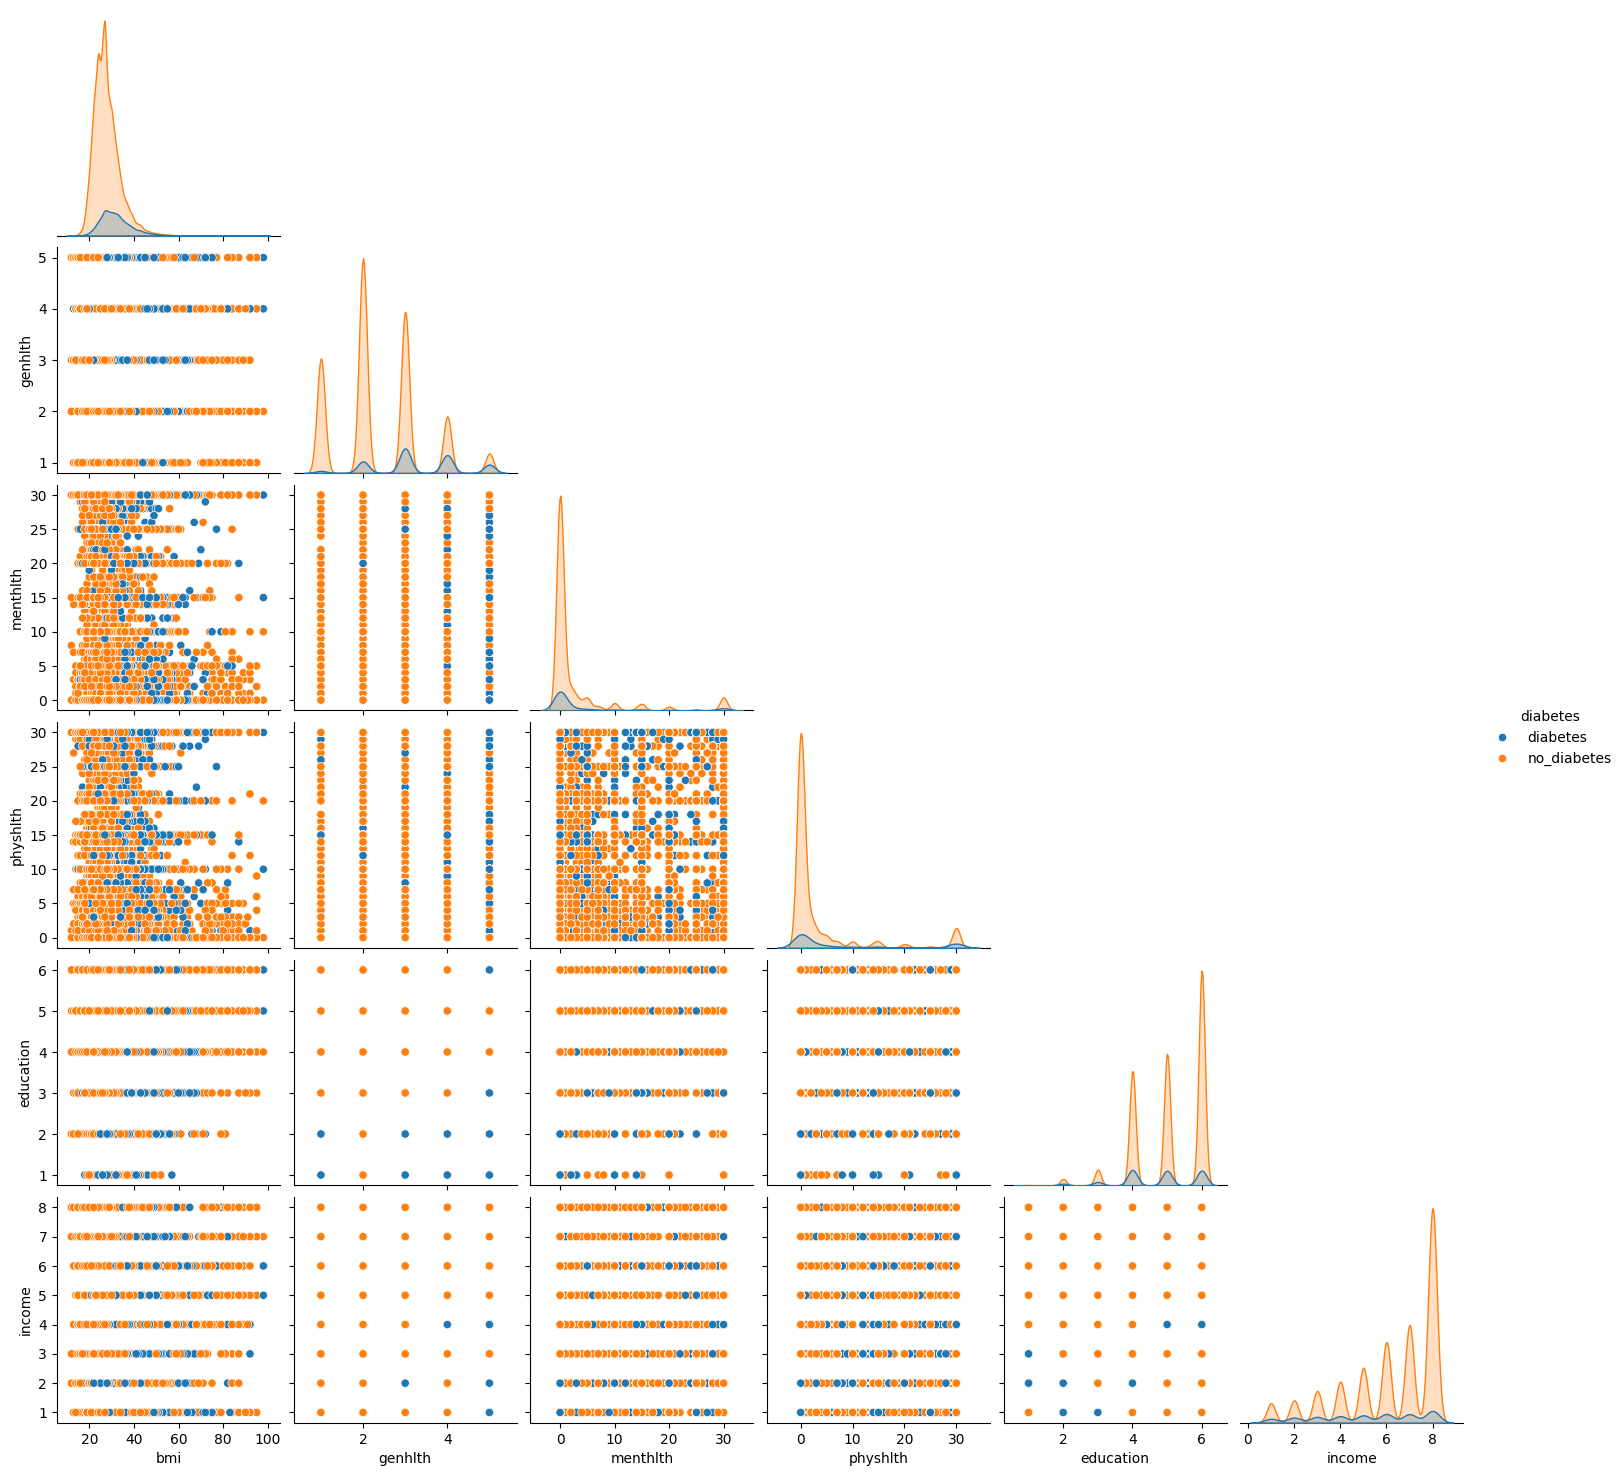

In [18]:
sns.pairplot(df_train, hue='diabetes', corner=True)
plt.show()

En el análisis bivariado de las variables numéricas, no se visualiza ninguna relación aparente entre estas variables.

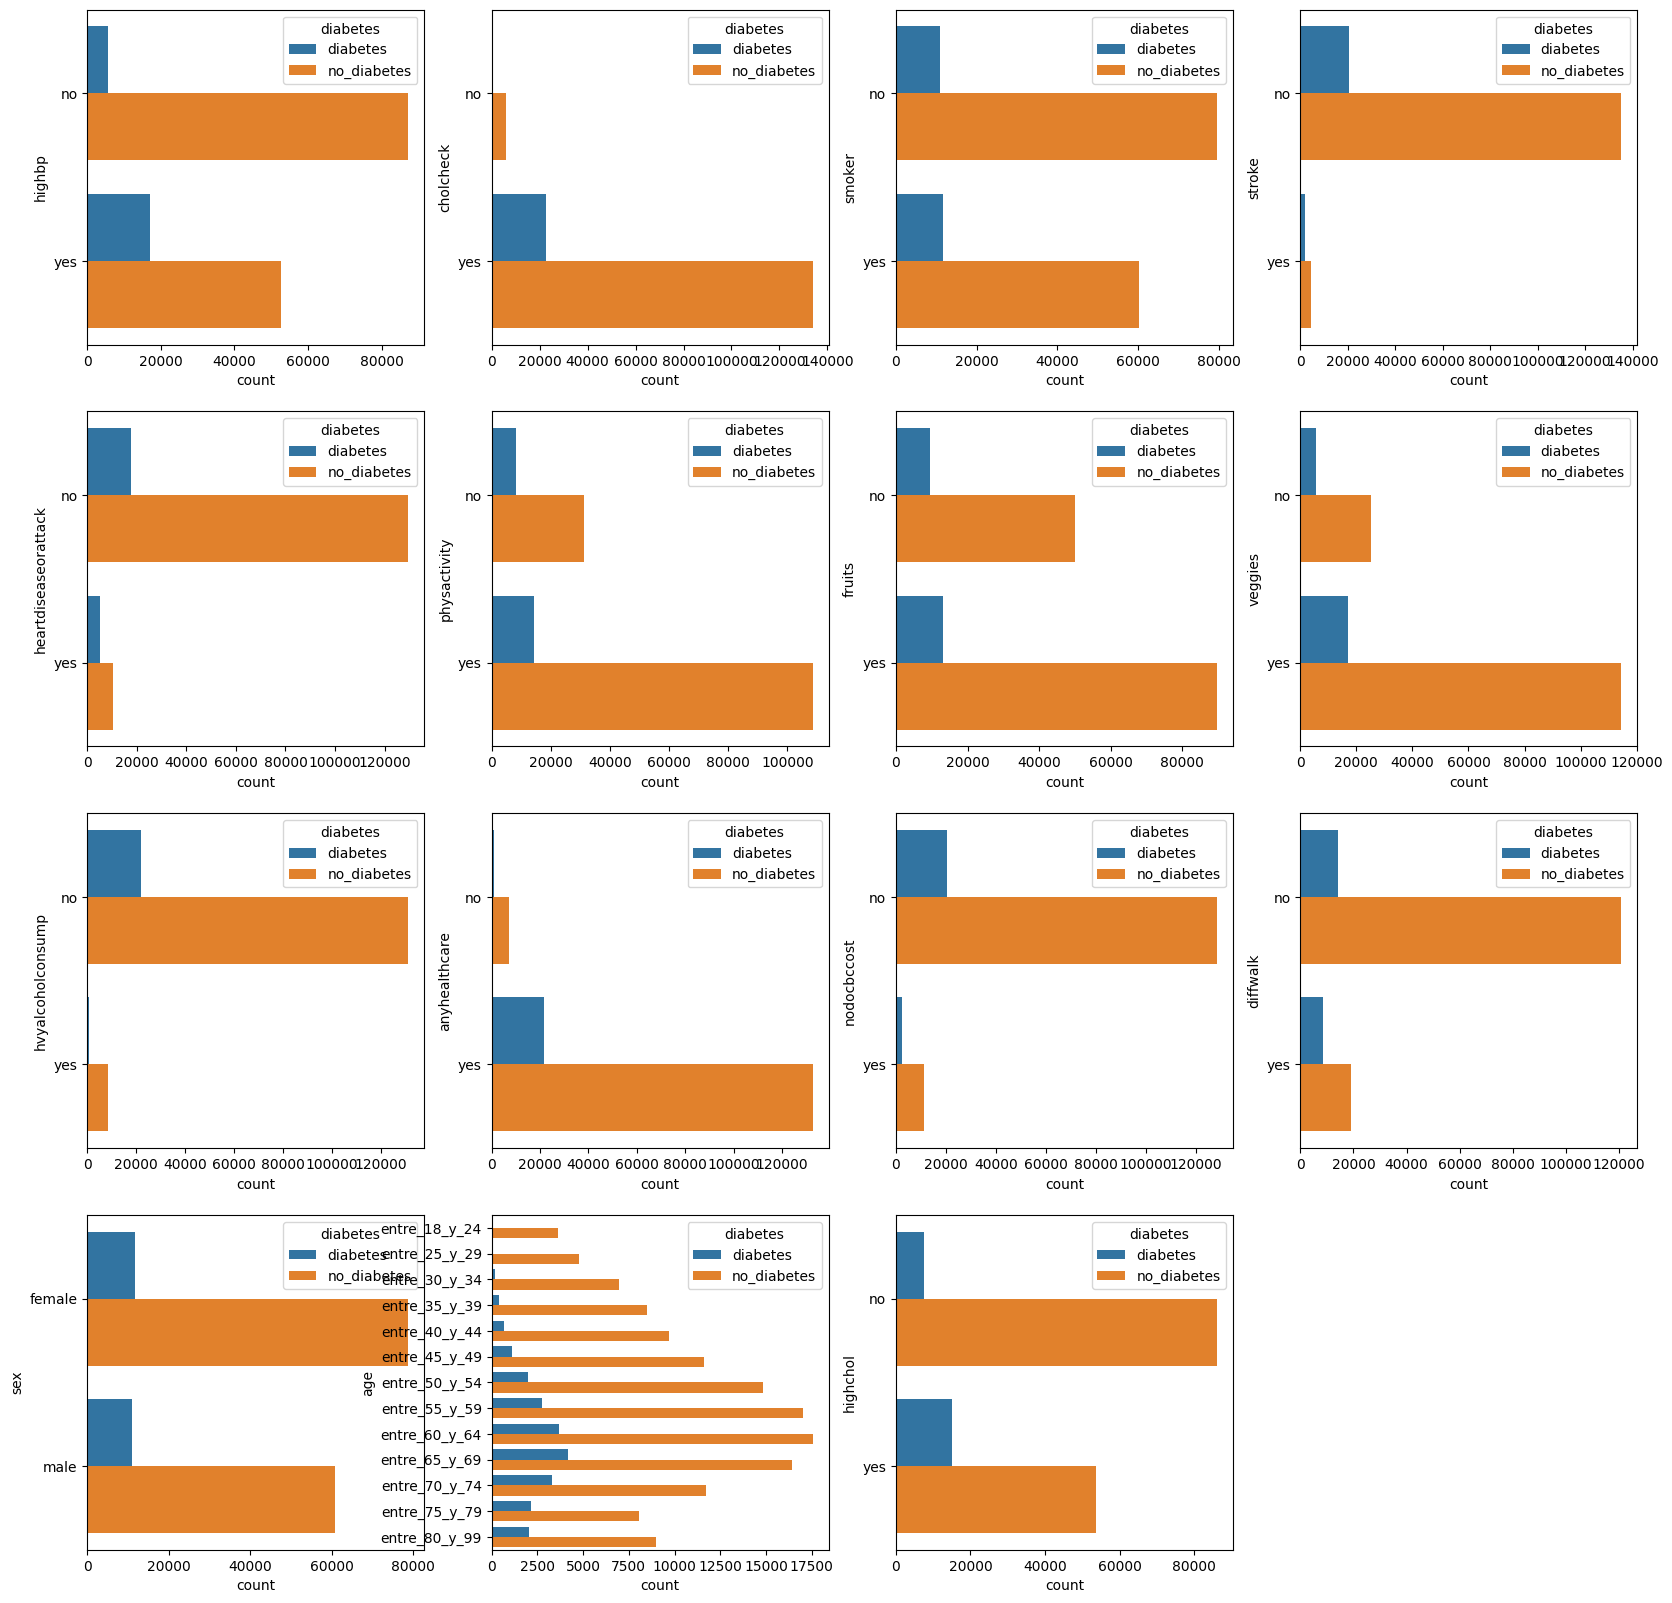

In [19]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
sns.countplot(data = df_train, hue='diabetes', y = 'highbp', ax = ax[0,0])
sns.countplot(data = df_train, hue='diabetes', y = 'cholcheck', ax = ax[0,1])
sns.countplot(data = df_train, hue='diabetes', y = 'smoker', ax = ax[0,2])
sns.countplot(data = df_train, hue='diabetes', y = 'stroke', ax = ax[0,3])
sns.countplot(data = df_train, hue='diabetes', y = 'heartdiseaseorattack', ax = ax[1,0])
sns.countplot(data = df_train, hue='diabetes', y = 'physactivity', ax = ax[1,1])
sns.countplot(data = df_train, hue='diabetes', y = 'fruits', ax = ax[1,2])
sns.countplot(data = df_train, hue='diabetes', y = 'veggies', ax = ax[1,3])
sns.countplot(data = df_train, hue='diabetes', y = 'hvyalcoholconsump', ax = ax[2,0])
sns.countplot(data = df_train, hue='diabetes', y = 'anyhealthcare', ax = ax[2,1])
sns.countplot(data = df_train, hue='diabetes', y = 'nodocbccost', ax = ax[2,2])
sns.countplot(data = df_train, hue='diabetes', y = 'diffwalk', ax = ax[2,3])
sns.countplot(data = df_train, hue='diabetes', y = 'sex', ax = ax[3,0])
sns.countplot(data = df_train, hue='diabetes', y = 'age', ax = ax[3,1])
sns.countplot(data = df_train, hue='diabetes', y = 'highchol', ax = ax[3,2])
# Ocultar el ax vacío
ax[3,3].set_visible(False)
plt.show()

En el análisis bivariado, vemos como en casi todas las variables la clase mayoritaria es la que tiene la representación más alta de diabetes, algunas cosas interesantes que se pueden rescatar, 'cholcheck' cuando la respuesta es 'no', no se tiene diabetes, sucede lo mismo con 'anyhealthcare',cuando la respuesta es 'no', se percibe como una línea la barra azul que indica 'diabetes', similar ocurre en 'stroke' y 'nodocbccost' que cuando la respuesta es 'yes' el grafico de barras que indica diabetes es muy pequeño, con 'sex' ocurre que 'female' es la clase mayorita tanto para no diabeticos como para diabeticos, en el grafico de 'age', se observa como a medida que sube el rango de edad se ve como sube el numero de casos con diabetes, siendo la edad con mas diabetes 'entre_65_y_69', y despues de alli se ve que baja un poco pero se mantiene entre los 75 y 99 años.

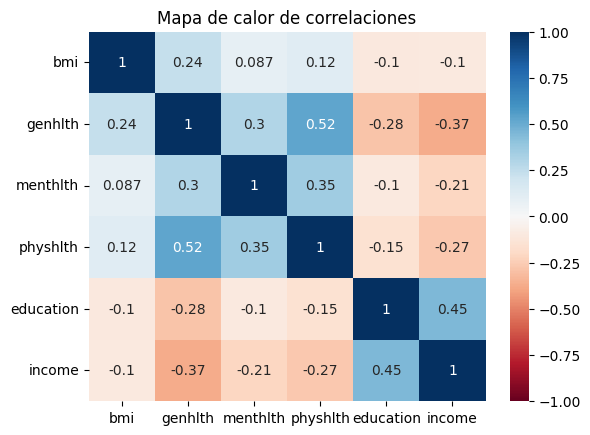

In [20]:
# Filtrar solo columnas numéricas
numericas = df_train.select_dtypes(include=['float']).columns

# Calcular la correlación para las columnas numéricas
corr_matrix = df_train[numericas].corr()

# Crear el heatmap
sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, annot=True, cmap='RdBu'
)
plt.title('Mapa de calor de correlaciones')
plt.show()

Esta matriz de correlación no dice mucho sobre la relación de las variables, como ya se ha visto casi todas las variables son binarias, o son escalas de satisfacción, por lo tanto, puede no ser el mejor enfoque para analizar las relaciones entre variables.

### **4.4 Machine learning**
**Objective**: Create a model that learns from data to make predictions and generalize to unseen data, and thus perform tasks without explicit instructions

In [21]:
X_train = df_train.drop('diabetes', axis=1)
y_train = df_train['diabetes']
X_val = df_val.drop('diabetes', axis=1)
y_val = df_val['diabetes']
X_test = df_test.drop('diabetes', axis=1)
y_test = df_test['diabetes']

In [22]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [23]:
cat_cols = X_train.select_dtypes("category").columns
num_cols = X_train.select_dtypes("number").columns
cat_proc = Pipeline([
    ("one_hot",OneHotEncoder(drop="first"))
])
num_proc = Pipeline([
    ("scaler",MinMaxScaler())
])
proccesor = ColumnTransformer([
    ("cat",cat_proc,cat_cols),
    ("num",num_proc,num_cols)
])

In [ ]:
clf_tree_p = Pipeline([
    ('proccesor', proccesor),
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=2025))
])

In [32]:
clf_tree_cv = GridSearchCV(
    clf_tree_p,
    param_grid= {
        'tree__criterion': ["gini", "entropy"],
        'tree__max_depth': [2,3,4,5]
    },
    cv = 10,
    scoring= 'f1_weighted',
    n_jobs=3
)
clf_tree_cv.fit(X_train, y_train_enc)
clf_tree_cv.best_params_

{'tree__criterion': 'gini', 'tree__max_depth': 2}

accuracy: 0.76
f1_score: 0.79
matthews_corrcoef: 0.31
              precision    recall  f1-score   support

    diabetes       0.32      0.61      0.42      5655
 no_diabetes       0.93      0.79      0.85     34934

    accuracy                           0.76     40589
   macro avg       0.62      0.70      0.64     40589
weighted avg       0.84      0.76      0.79     40589



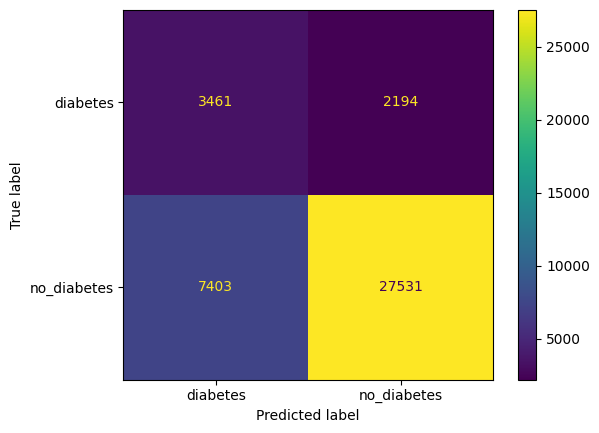

In [33]:
y_hat_val = clf_tree_cv.best_estimator_.predict(X_val)
print(f'accuracy: {accuracy_score(y_val_enc, y_hat_val):.2f}')
print(f"f1_score: {f1_score(y_val_enc, y_hat_val, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_val_enc, y_hat_val):.2f}')
print(classification_report(y_val_enc,y_hat_val,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_val_enc, y_hat_val, display_labels= label_encoder.classes_)
plt.show()

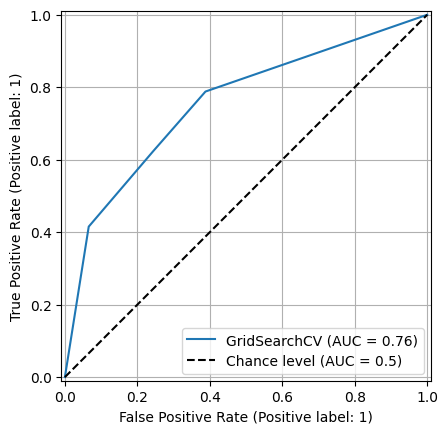

In [36]:
RocCurveDisplay.from_estimator(
    clf_tree_cv,X_val,y_val_enc,plot_chance_level=True
)
plt.grid(True)
plt.show()

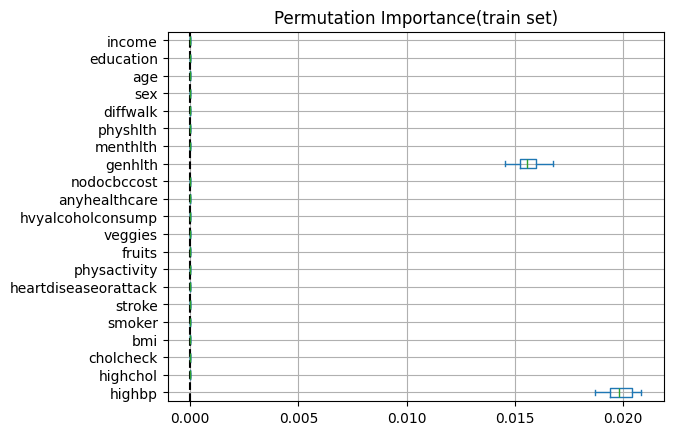

In [37]:
importance = permutation_importance(clf_tree_cv,X_train,y_train_enc,n_repeats=25,random_state=42)
importance_df = pd.DataFrame(importance.importances.T,columns=X_train.columns)
ax = importance_df.plot.box(vert=False)
ax.axvline(x=0,color="k",linestyle="--")
ax.set_title("Permutation Importance(train set)")
ax.grid(True)
plt.show()

accuracy: 0.76
f1_score: 0.79
matthews_corrcoef: 0.31
              precision    recall  f1-score   support

    diabetes       0.32      0.61      0.42      7069
 no_diabetes       0.93      0.79      0.85     43667

    accuracy                           0.76     50736
   macro avg       0.62      0.70      0.64     50736
weighted avg       0.84      0.76      0.79     50736



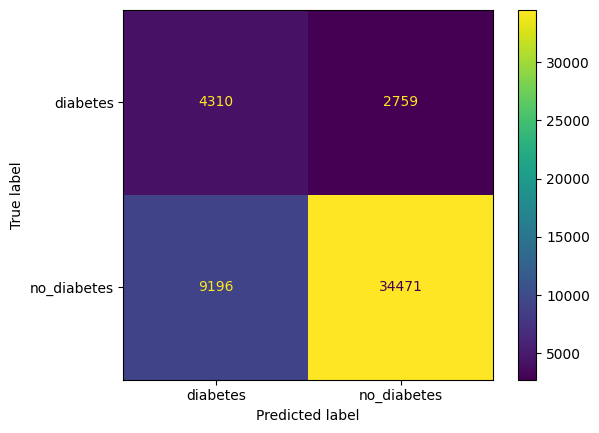

In [40]:
y_hat_test = clf_tree_cv.best_estimator_.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat_test):.2f}')
print(f"f1_score: {f1_score(y_test_enc, y_hat_test, average='weighted'):.2f}")
print(f'matthews_corrcoef: {matthews_corrcoef(y_test_enc, y_hat_test):.2f}')
print(classification_report(y_test_enc,y_hat_test,target_names= label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat_test, display_labels= label_encoder.classes_)
plt.show()

In [ ]:
clf_rforest_p = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rforest', RandomForestClassifier(class_weight='balanced', random_state=2025))
])

clf_gboost_p = Pipeline([
    ('scaler', MinMaxScaler()),
    ('gboost', GradientBoostingClassifier(random_state=2025))
])

### Referencias


[2015 calculated variables: age](https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_calculated_variables_version4.pdf)